# Medical Insurance Cost Prediction
The objective of this case study is to predict the health insurance cost incurred by Individuals based on their age, gender, BMI, number of children, smoking habit and geo-location.


### Features available are:

- sex: insurance contractor gender, female, male

- bmi: Body mass index (ideally 18.5 to 24.9)

- children: Number of children covered by health insurance / Number of dependents

- smoker: smoking habits

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

## Importing Essentials

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [59]:
df = pd.read_csv('insurance.csv')

## Exploratory Data Analysis

In [60]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [61]:
df.shape

(1338, 7)

In [62]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [63]:
region_dummies = pd.get_dummies(df['region'], drop_first=True)
region_dummies.head()

,northwest,southeast,southwest
0,False,False,True
1,False,True,False
2,False,True,False
3,True,False,False
4,True,False,False


In [64]:
df = pd.concat([df, region_dummies], axis=1)

In [65]:
df.drop(['region'],axis=1, inplace=True)

In [66]:
df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,female,27.900,0,yes,16884.92400,False,False,True
1,18,male,33.770,1,no,1725.55230,False,True,False
2,28,male,33.000,3,no,4449.46200,False,True,False
3,33,male,22.705,0,no,21984.47061,True,False,False
4,32,male,28.880,0,no,3866.85520,True,False,False


In [67]:
df.isnull().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
charges      0
northwest    0
southeast    0
southwest    0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   object 
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   object 
 5   charges    1338 non-null   float64
 6   northwest  1338 non-null   bool   
 7   southeast  1338 non-null   bool   
 8   southwest  1338 non-null   bool   
dtypes: bool(3), float64(2), int64(2), object(2)
memory usage: 66.8+ KB


In [69]:
df_age = df.groupby(by='age').mean(numeric_only=True)
df_age

,bmi,children,charges,northwest,southeast,southwest
age,,,,,,
18,31.326159,0.449275,7086.217556,0.000000,0.536232,0.000000
19,28.596912,0.426471,9747.909335,0.500000,0.044118,0.455882
20,30.632759,0.862069,10159.697736,0.241379,0.275862,0.275862
21,28.185714,0.785714,4730.464330,0.250000,0.250000,0.250000
22,31.087679,0.714286,10012.932802,0.250000,0.285714,0.214286
23,31.454464,1.000000,12419.820040,0.250000,0.250000,0.250000
24,29.142679,0.464286,10648.015962,0.250000,0.250000,0.250000
25,29.693929,1.285714,9838.365311,0.250000,0.250000,0.250000
26,29.428929,1.071429,6133.825309,0.250000,0.250000,0.250000


In [70]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data Visualization

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

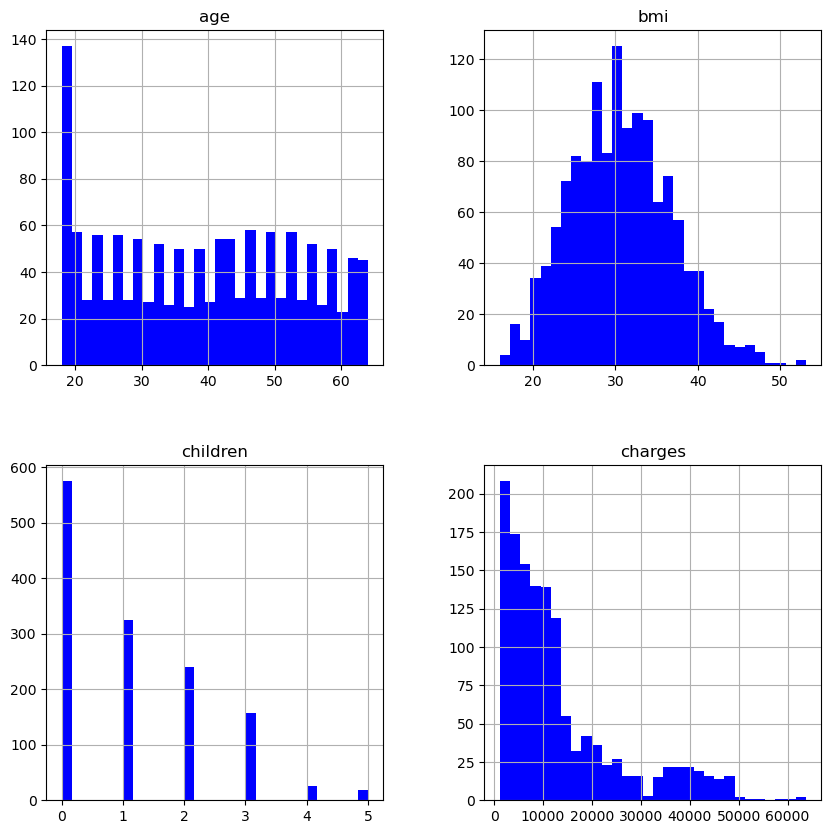

In [71]:
df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins=30, figsize=(10,10),color='blue')

C:\Users\drasw\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\drasw\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
C:\Users\drasw\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\drasw\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
C:\Users\drasw\anaconda3\Lib\site-packages\seaborn\_stats\

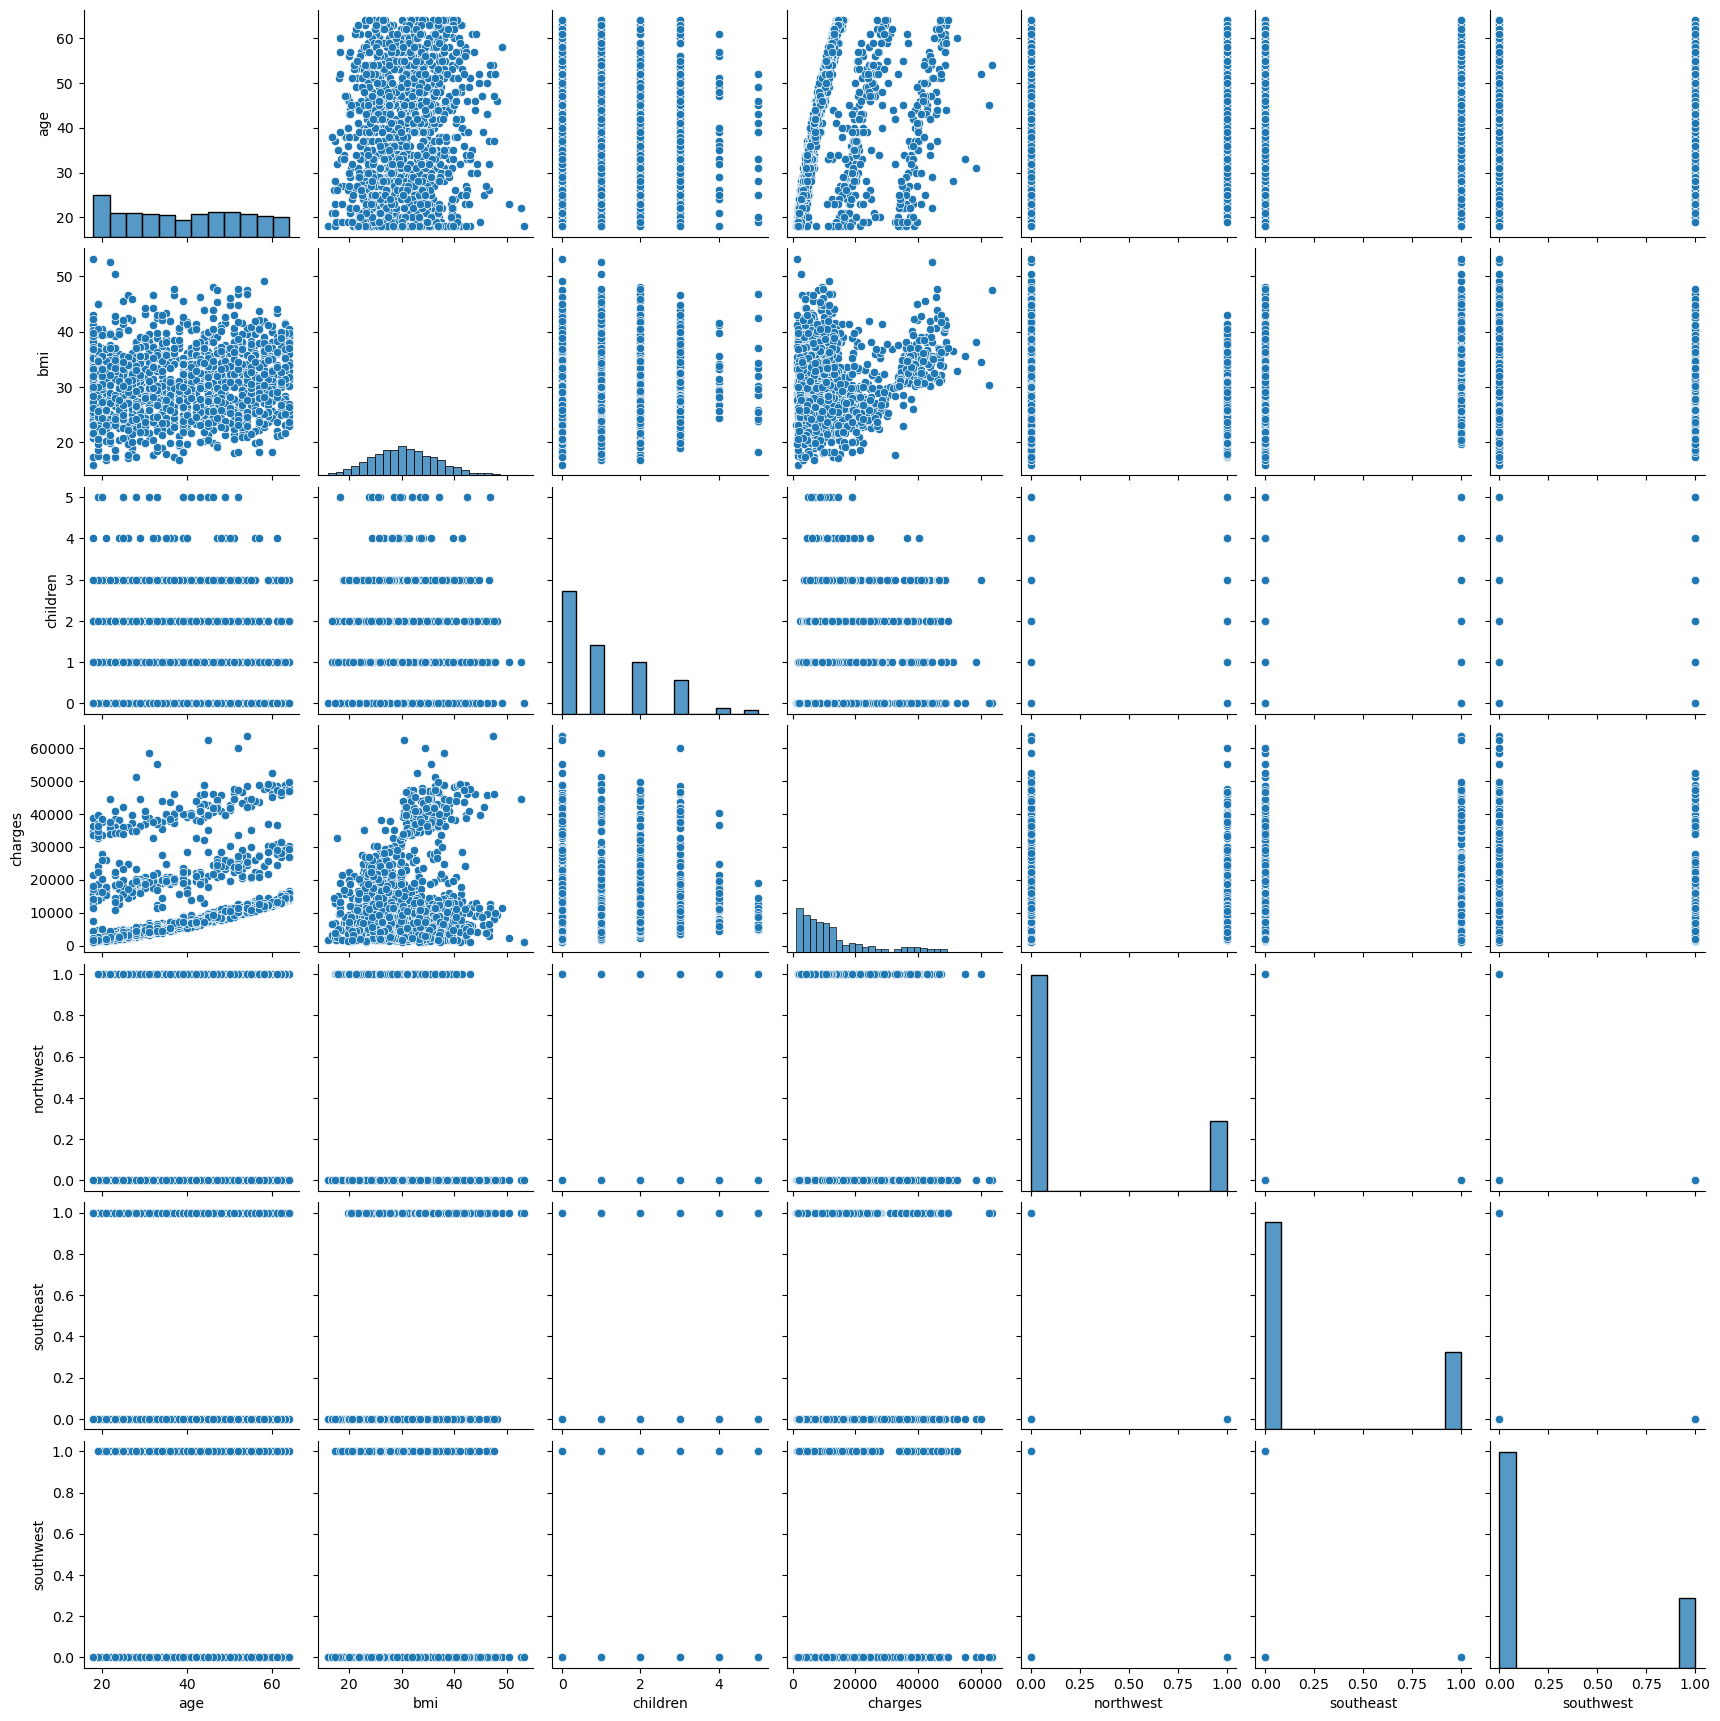

In [72]:
sns.pairplot(df)

Check the realtionship between the age and Charges, we can see the it is more complex than a linear relationship.

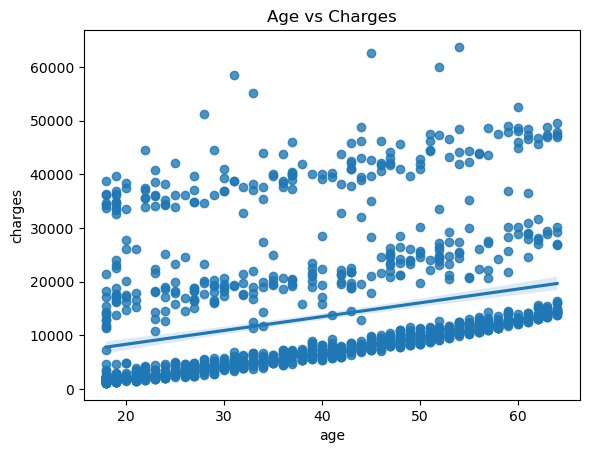

In [73]:
sns.regplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')
plt.show()

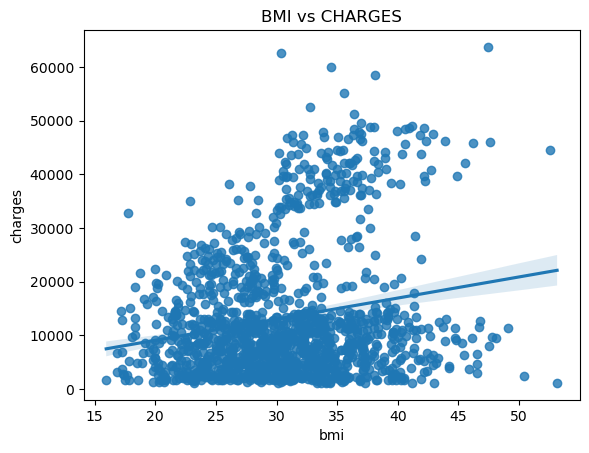

In [74]:
sns.regplot(x='bmi', y='charges', data=df)
plt.title('BMI vs CHARGES')
plt.show()

Smoke have the most positive relationship with the charges

As we know that machine can understand only numbers, so let's convert it into numbers.

In [80]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)
#smoker or not
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)

In [81]:
df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


Correlation between different attriubtes of the data

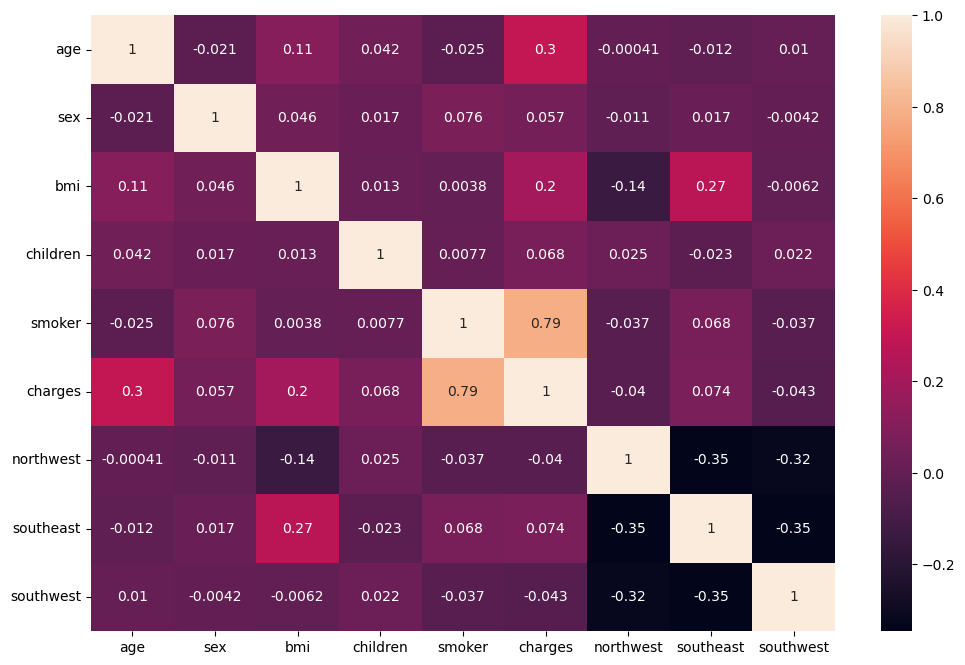

In [82]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Distrubtion of charges between smokers and non-smokers

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

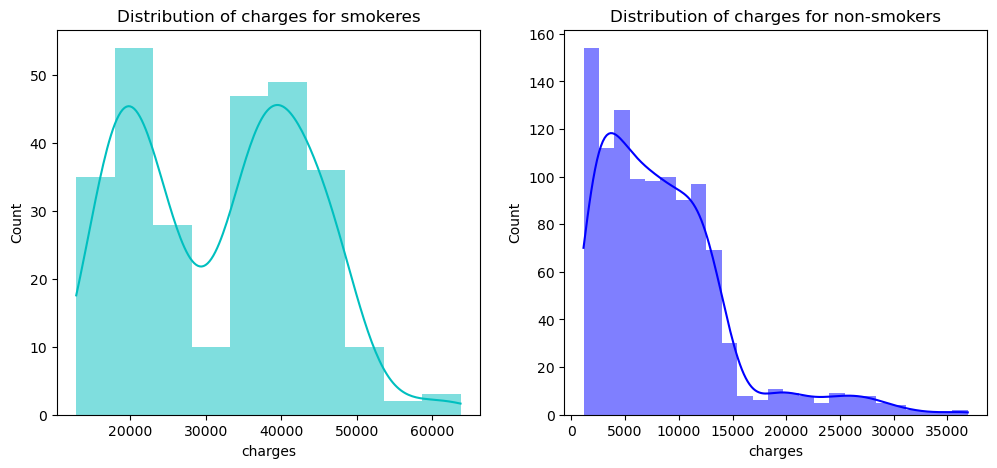

In [83]:
f = plt.figure(figsize=(12,5))

ax = f.add_subplot(121)
sns.histplot(df[(df.smoker==1)]['charges'], color='c',ax=ax,kde=True, linewidth=0)
ax.set_title('Distribution of charges for smokeres')

ax = f.add_subplot(122)
sns.histplot(df[(df.smoker==0)]['charges'],color='b',ax=ax,kde=True,linewidth=0)
ax.set_title('Distribution of charges for non-smokers')

Smoking patients spend more on treatment. But there is a feeling that the number of non-smoking patients is greater. Going to check it.

C:\Users\drasw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x800 with 0 Axes>

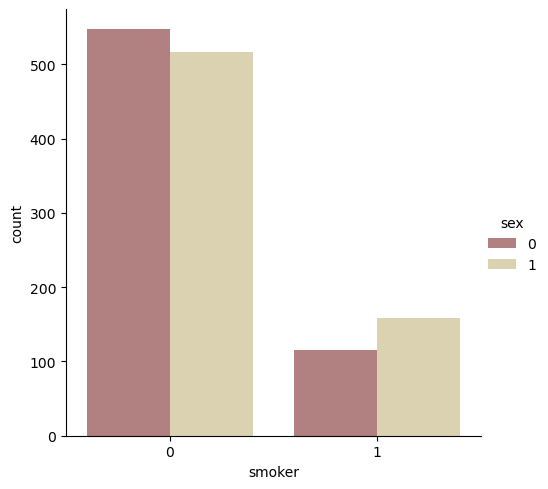

In [84]:
plt.figure(figsize=(8,8))
sns.catplot(x='smoker', kind='count', hue='sex', palette='pink', data=df)

Please note that women are coded with the symbol " 1 "and men "0". Thus non-smoking people and the truth more. Also we can notice that more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking. Maybe we'll check it out later. And some more useful visualizations.

C:\Users\drasw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


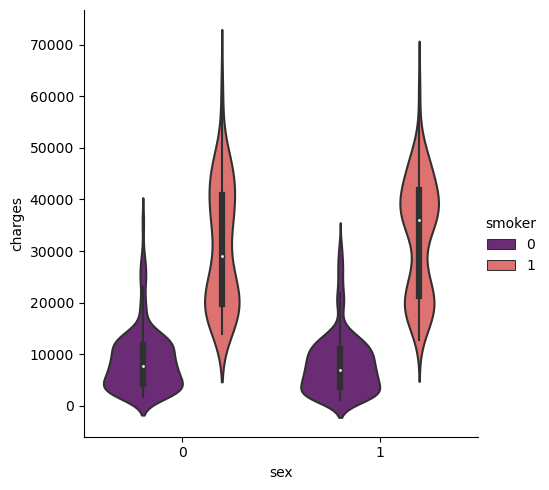

In [85]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=df, palette = 'magma')

## Sex wise charges

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

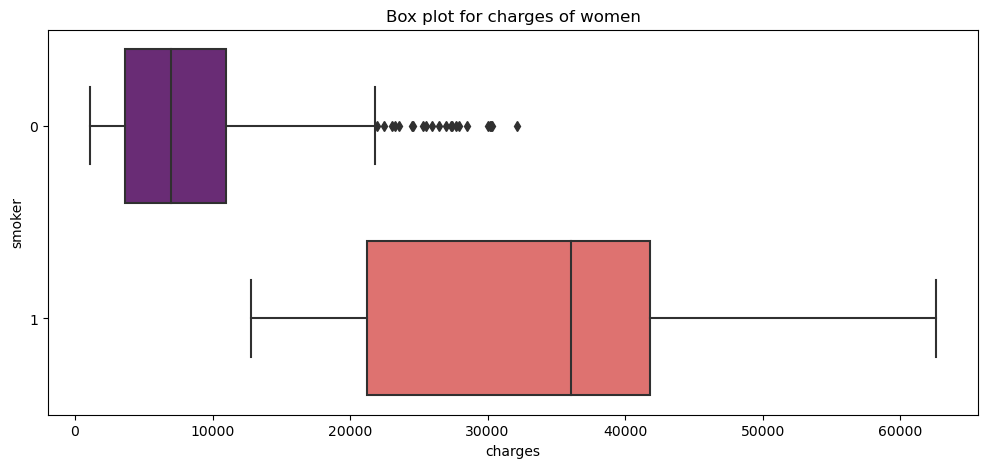

In [86]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y='smoker',x='charges',data=df[(df.sex == 1)] , orient='h',palette='magma')

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

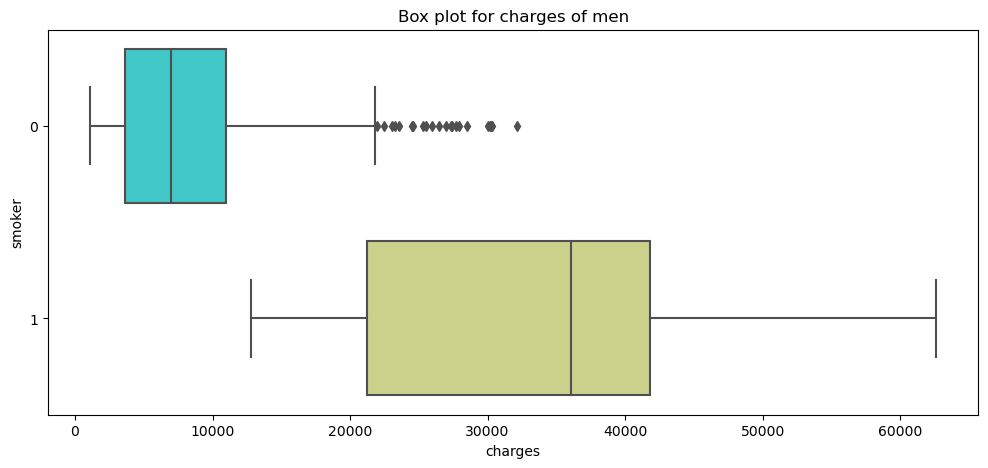

In [87]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y='smoker',x='charges',data=df[(df.sex == 1)] , orient='h',palette='rainbow')

Now let's pay attention to the age of the patients. First, let's look at how age affects the cost of treatment, and also look at patients of what age more in our data set.

<Axes: title={'center': 'Distribution of age'}, xlabel='age', ylabel='Count'>

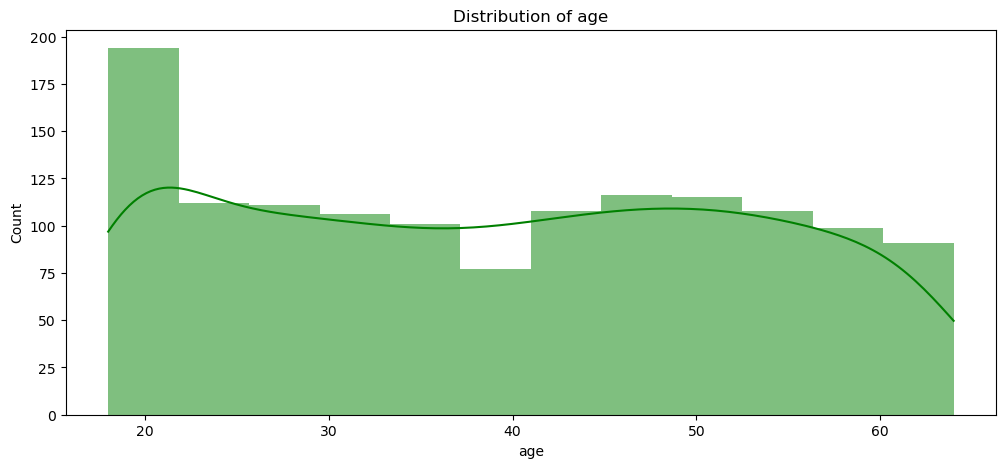

In [88]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
sns.histplot(df['age'],color='g',kde=True, linewidth=0)

### Young age charges

Let's check whether there are smokers among pateints 18 years.

C:\Users\drasw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

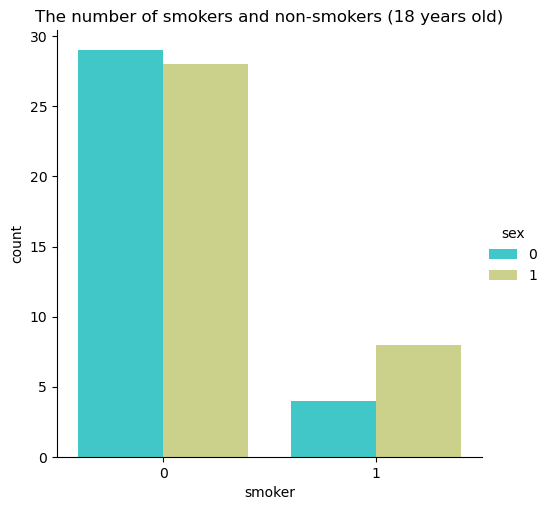

In [89]:
sns.catplot(x='smoker', kind='count', hue='sex', palette='rainbow',data=df[(df.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

For 18 years old, let's check the treatment cost of this age.

<Axes: title={'center': 'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

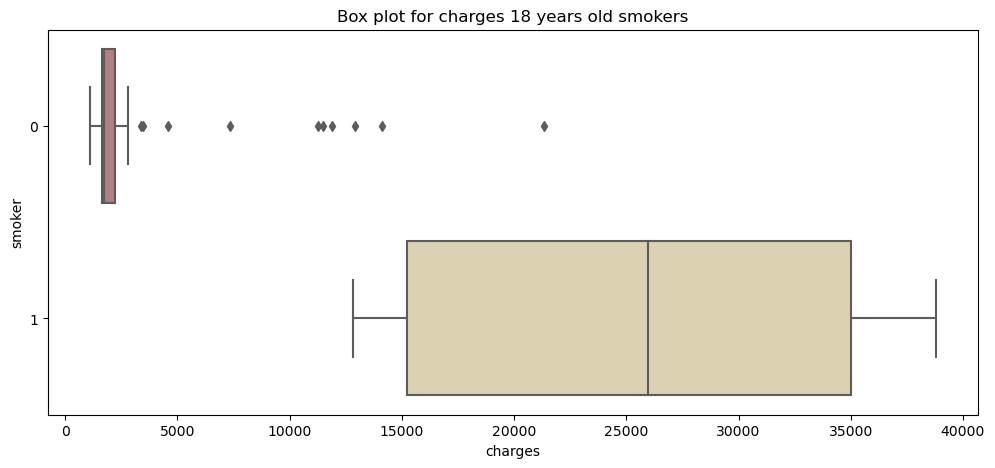

In [90]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y='smoker', x='charges', data=df[(df.age ==18)],orient='h',palette='pink')

From above insight we can say that at the age of 18 smokers spend much more on treatment than non-smokers. Also non-smokers are seeing some "tails". I can assume that this is due to serious disease or accidents.

### Now let's check about BMI

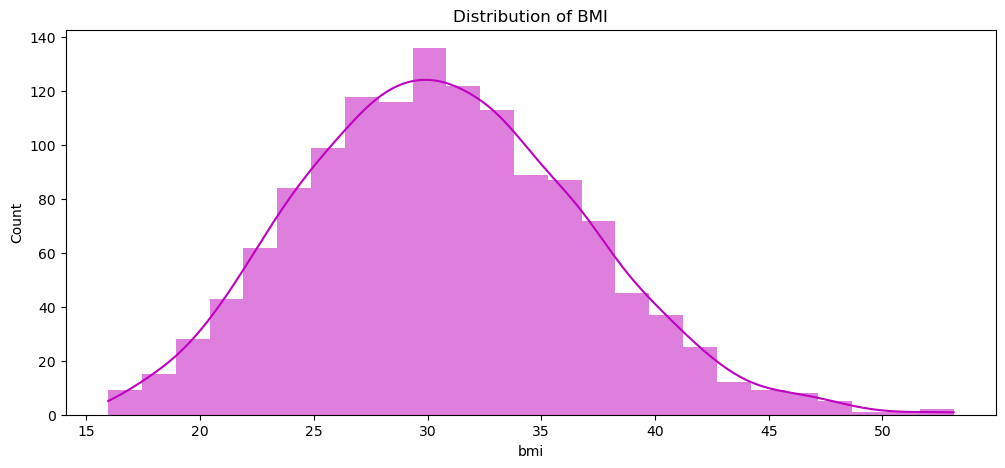

In [91]:
plt.figure(figsize=(12,5))
plt.title("Distribution of BMI")
ax = sns.histplot(df['bmi'],color="m",kde=True, linewidth=0)

The average BMI in patients is 30. 

### BMI range

BMI ----> Weight status

below 18.5 ----> Underweight

18.5 - 24.9 ----> Normal Weight

25.0 - 29.9 ----> Overweight

30.0 - 34.9 ----> Obeisty Class I

35.0 - 39.9 ----> Obesity Class II

Above 40 ----> Obesity Class III

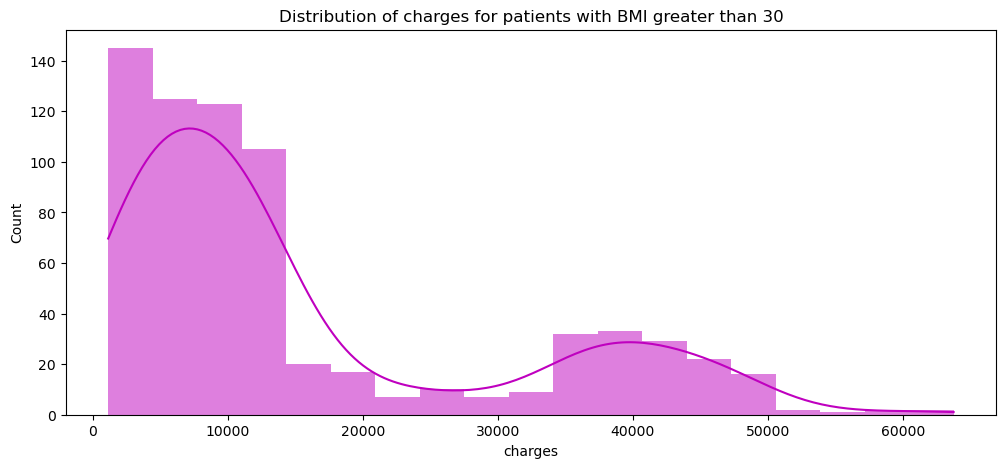

In [92]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.histplot(df[(df.bmi >= 30)]['charges'], color = 'm', kde=True,linewidth=0)

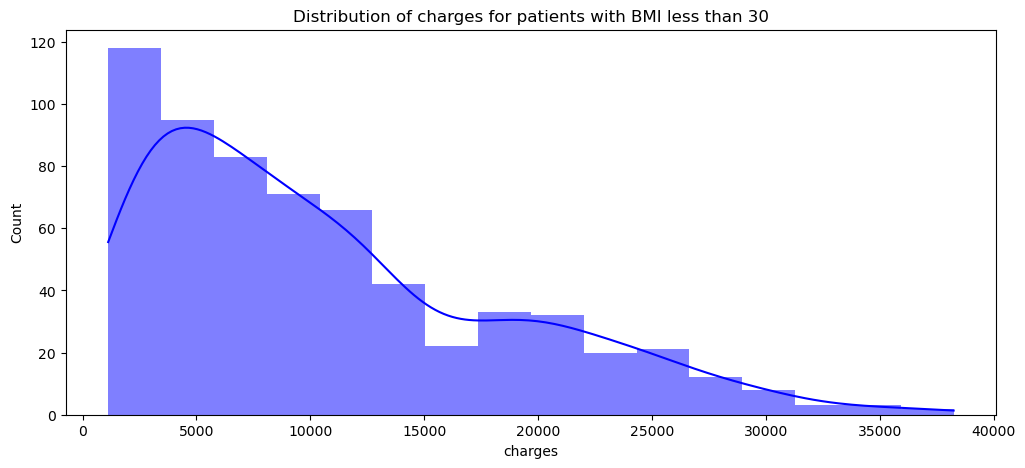

In [93]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.histplot(df[(df.bmi<30)]['charges'], color='b', kde=True,linewidth=0)

#### Patients with BMI above 30 spend more on treatment

Let's pay attention to children. First, let's see how many children our patients have.

C:\Users\drasw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


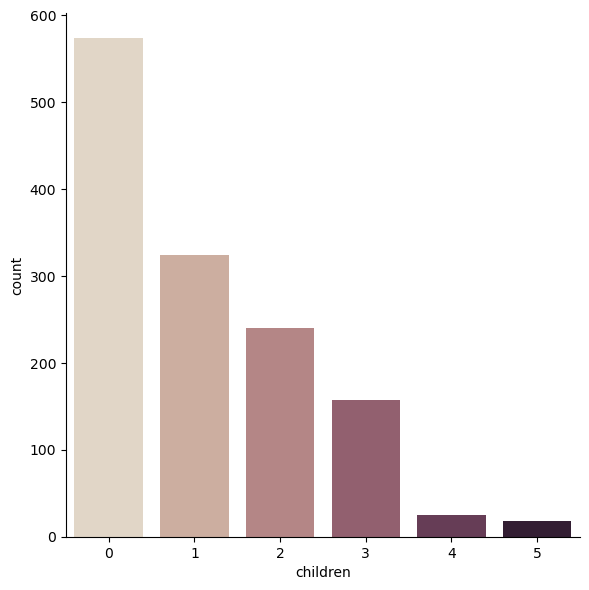

In [94]:
sns.catplot(x="children", kind="count", palette="ch:.25",data=df, height=6)

Most patients do not have children.

C:\Users\drasw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Smokers and non-smokers who have children')

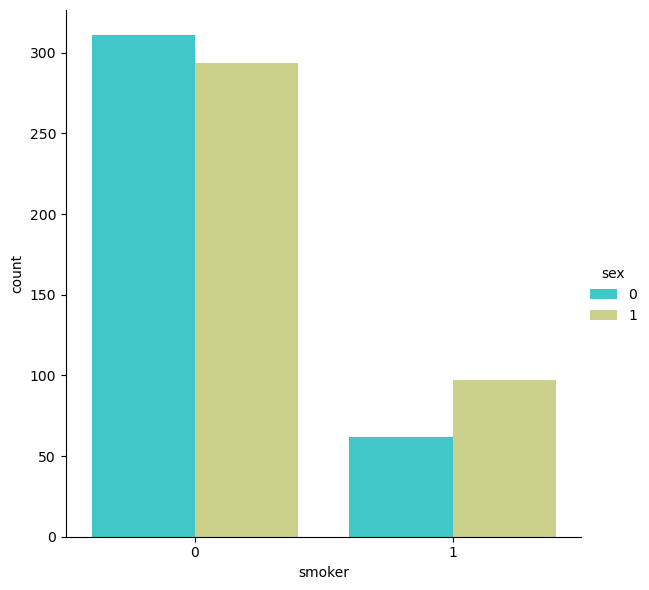

In [95]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue="sex",data=df[(df.children > 0)], height=6)
ax.set_title("Smokers and non-smokers who have children")

### Splitting the data into training and tesring 

Charges is out target

In [96]:
X = df.drop(['charges'],axis=1)
y = df.charges

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(1070, 8)
(268, 8)


# Creating function for model fitting and sccuracy

In [97]:
def model_pred(model):
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))

## Linear Regression

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
lr = LinearRegression()

Hyperparameter optimization on the Random Forest Regressor for better result

## Random Forest Regressor

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Random Forest Regressor
rfr = RandomForestRegressor()
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [4,5,6,7,8],
    "max_features": ["auto", "sqrt", "log2"],
    'random_state': [0,1,42]
}

In [101]:
# RandomizedSearchCV 
cv_random = RandomizedSearchCV(rfr, param_grid, cv=5)
cv_random.fit(X_train, y_train)

C:\Users\drasw\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\drasw\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\drasw\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\drasw\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\drasw\anaconda3\Lib\site-packages\

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 200],
                                        'random_state': [0, 1, 42]})

In [102]:
# Best Combination of parameters
cv_random.best_params_

{'random_state': 1,
 'n_estimators': 100,
 'max_features': 'log2',
 'max_depth': 7}

In [103]:
rfReg = RandomForestRegressor(n_estimators=100, max_features='auto', max_depth=4,random_state=42)

## XGBoost Regressor

In [104]:
from xgboost import XGBRegressor

xgbR = XGBRegressor()

xgb_params = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [4, 6, 8, 10],
    'min_child_weight' : [2,4,10,12]
}

In [105]:
# GridSearchCV
cv_xgbR = GridSearchCV(xgbR, xgb_params, cv=5)
cv_xgbR.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_child_weight': [2, 4, 10, 12],
                         'n_estimators': [100, 200, 300]})

In [106]:
# Best combination of parameters
cv_xgbR.best_params_

{'max_depth': 4, 'min_child_weight': 12, 'n_estimators': 100}

In [107]:
xgbReg = XGBRegressor(max_depth=4, min_child_weight=10, n_estimators=100)

## Performance of the model

In [108]:
print("Score of Linear Regression:\n")
model_pred(lr)

Score of Linear Regression:

0.7999876970680433


In [51]:
print("Score of Random Forest Regressor:\n")
model_pred(rfReg)

Score of Random Forest Regressor:

0.8979119932825297


In [109]:
print("Score of XGBoost Regressor:\n")
model_pred(xgbReg)

Score of XGBoost Regressor:

0.8841305469447374


## From above result we can say that Random Forest Regressor is better choice for this task

### Evaluate Model with Random Forest Regressor

In [53]:
rfReg_train_pred = rfReg.predict(X_train)
rfReg_test_pred = rfReg.predict(X_test)

print("MSE train data: %.3f, MSE test data: %.3f"%(mean_squared_error(y_train, rfReg_train_pred),mean_squared_error(y_test, rfReg_test_pred)))
print("R2 train data: %.3f, R2 test data: %.3f"%(r2_score(y_train, rfReg_train_pred),r2_score(y_test, rfReg_test_pred)))

MSE train data: 19045053.031, MSE test data: 16245260.662
R2 train data: 0.867, R2 test data: 0.898


### Actual vs Predicted

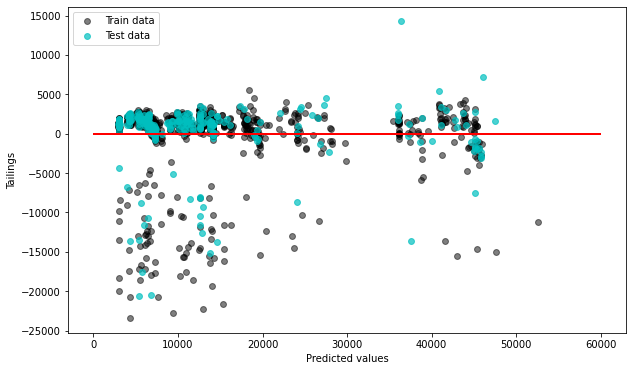

In [54]:
plt.figure(figsize=(10,6))

plt.scatter(rfReg_train_pred, rfReg_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(rfReg_test_pred,rfReg_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()